# Drug Induced Autoimmunity Prediction
## Project Overview
Drug-induced autoimmunity (DIA) refers to the onset of autoimmune responses triggered by certain medications, leading the immune system to mistakenly attack the body’s own tissues. This phenomenon can result in clinical conditions resembling autoimmune diseases such as lupus, hepatitis, or vasculitis. Identifying and predicting drugs with potential to induce autoimmunity is critical for ensuring patient's safety and guiding drug development.

Predictive modeling of DIA involves integrating chemical, biological, and clinical data. Computational approaches typically utilize molecular descriptors derived from chemical structure using RDKit alongside machine learning models trained on known DIA-associated drugs. Using SMILES representation of chemical structure the RDKit can generate molecular discriptors which can be used to train machine learning models. Data consists of known drugs with known possibility of autoimmune risk which are further classified in 'True' of 'False'.

## Project Objective
The main objective of this project is to identify which drug leads to autoimmune risks. Characterstics of drugs are generated through RDKit, an open-source toolkit for cheminformatics, using SMILES (Simplified Molecular Input Line Entry System) representation of chemical structures. This project aims to train and deploy highly accurate machine learning model to predict drug induced autoimmunity with high accuracy.The dataset contains many feature and a classification approach is needed to detect drug leading to autoimmune risks.

In this project we are utilizing the Exploratory Data Analysis (EDA) as a data exploration technique to acquire knowledge, discover new relations, apply new methodologies, and unravel patterns in data. It is important to apply the necessary rationale behind each step to address the main objective of the study.

So, the primary objective of this project is to develop a machine learning model for Drug Induced Autoimmunity Prediction.

RBKit is a an open-source toolkit for cheminformatics. It allows user to input a chemical formula in SMILES to get the descriptors of it. 

|Features|Values|
|---|---|
|SMILES|Text-based representation of a molecule using the SMILES notation|
|BalabanJ| Balaban's J index measuring molecular complexity and connectivity|
|BertzCT | Bertz complexity index based on atom types and molecular branching|
|Chi0 to Chi4v | Kier & Hall chi indices (valence and non-valence), encoding molecular connectivity|
|EState_VSA1 to EState_VSA11|Sum of electrotopological state values for atoms in predefined van der Waals surface area (VSA) bins|
|ExactMolWt|Exact molecular weight based on atomic masses|
|FractionCSP3|Fraction of sp³ hybridized carbons|
|HallKierAlpha | Descriptor related to molecular branching and shape|
|HeavyAtomCount | Number of non-hydrogen atoms|
|HeavyAtomMolWt | Molecular weight of heavy atoms only|
|Ipc | content index measuring atom distribution|
|Kappa1, Kappa2, Kappa3 | Shape indices quantifying molecular flexibility and complexity|
|LabuteASA | Approximate molecular surface area using Labute’s method|
|MaxAbsEStateIndex / MinAbsEStateIndex | Maximum/Minimum absolute electrotopological state index|
|MaxEStateIndex / MinEStateIndex | Raw max/min E-state values|
|MaxAbsPartialCharge / MinAbsPartialCharge | Max/Min absolute atomic partial charges|
|MaxPartialCharge / MinPartialCharge | Raw max/min partial charges|
|MolLogP | Log octanol-water partition coefficient (lipophilicity)|
|MolMR | Molar refractivity; measure of molecular volume and polarizability|
|MolWt | Average molecular weight (including isotope averages)|
|NHOHCount | Number of -NH or -OH groups|
|NOCount | Total number of N and O atoms|
|NumHAcceptors / NumHDonors | Count of hydrogen bond acceptors/donors|
|NumHeteroatoms | Non-carbon/hydrogen atoms|
|NumRadicalElectrons | Number of radical (unpaired) electrons|
|NumRotatableBonds |  Bonds that allow free rotation|
|NumValenceElectrons | Total valence electrons in the molecule|
|NumAliphaticCarbocycles / NumAliphaticHeterocycles / NumAliphaticRings | Count of non-aromatic rings with/without heteroatoms|
|NumAromaticCarbocycles / NumAromaticHeterocycles / NumAromaticRings | Count of aromatic rings with/without heteroatoms|
|NumSaturatedCarbocycles / NumSaturatedHeterocycles / NumSaturatedRings | Count of saturated ring systems|
|RingCount | Total number of rings|
|PEOE_VSAx / SMR_VSAx / SlogP_VSAx / VSA_EStatex | Partitioning of molecular surface area into bins based on partial charge (PEOE), molar refractivity (SMR), logP (SlogP), and E-state values respectively (x denotes bin index)|
|TPSA | Topological polar surface area; estimate of drug absorption and permeability|
|fr_Al_COO | Aliphatic carboxylic acid|
|fr_Ar_OH | Aromatic hydroxyl group (e.g., phenol)|
|fr_benzene | Benzene rings|
|fr_nitro | Nitro groups|
|(...and so on — each fr_ descriptor corresponds to a specific functional group or motif such as ketones, esters, amines, halides, etc.)|

There are over 100 of these "fragment" descriptors, and each one is essentially a Boolean or integer indicating if and how many times a structural motif appears in the molecule.

**Importing Libraries**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [48]:
train_df = pd.read_csv("DIA_training.csv")
test_df = pd.read_csv("DIA_test.csv")

## Exploratory Data Analysis:

### For Training Dataset

In [49]:
train_df.head()

,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Label
0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,6.668,...,0,0,0,0,0,0,0,0,0,No
1,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,3.545,...,0,0,0,0,0,0,1,0,1,No
2,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,2.820,...,0,0,0,0,0,0,0,0,0,No
3,CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,7.662,...,0,0,0,0,0,0,0,0,0,Yes
4,C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,3.601,...,0,0,0,0,0,0,0,0,0,Yes


In [50]:
train_df.shape

(477, 198)

In [51]:
train_df.columns

Index(['SMILES', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1',
       'Chi1n', 'Chi1v', 'Chi2n',
       ...
       'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
       'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'Label'],
      dtype='object', length=198)

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Columns: 198 entries, SMILES to Label
dtypes: float64(83), int64(113), object(2)
memory usage: 738.0+ KB


In [53]:
train_df.describe()

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,...,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0,477.000000,477.000000,477.000000
mean,2.142618,738.629776,18.130015,14.372379,14.886985,11.874170,8.433990,8.963610,6.672302,7.253495,...,0.054507,0.050314,0.014675,0.006289,0.008386,0.031447,0.0,0.027254,0.327044,0.027254
std,0.710916,392.967592,7.247300,6.093945,6.134658,4.828675,3.756045,3.813948,3.282600,3.340274,...,0.245047,0.245944,0.120375,0.079138,0.091285,0.186342,0.0,0.175409,1.372740,0.162993
min,0.986000,8.000000,3.414000,1.725000,1.725000,1.732000,0.612000,0.612000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.679000,493.255000,13.405000,10.391000,10.763000,8.724000,5.807000,6.340000,4.399000,4.931000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.964000,712.423000,17.646000,14.184000,14.683000,11.770000,8.351000,8.997000,6.362000,7.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,2.419000,943.190000,22.052000,17.730000,18.216000,14.507000,10.588000,11.128000,8.554000,9.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,5.083000,2430.934000,50.120000,38.475000,39.837000,31.516000,23.166000,24.440000,19.352000,19.615000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.0,2.000000,18.000000,1.000000


In [54]:
train_df["Label"].value_counts() #unbalance dataset

Label
No     359
Yes    118
Name: count, dtype: int64

In [55]:
train_df["Label"].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
# sns.heatmap(train_df.drop(["SMILES", "Label"], axis=1).corr(), annot=True)

### For Testing Dataset

In [57]:
test_df.head()

,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Label
0,C[C@H](\C=C\[C@H](O)C1CC1)[C@@H]2CC[C@@H]3\C(=...,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,10.736,...,0,0,0,0,0,0,0,0,0,No
1,OCCN1CCN(CCCN2c3ccccc3Sc4ccc(cc24)C(F)(F)F)CC1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,7.662,...,0,0,0,0,0,0,0,0,0,Yes
2,C[C@@H]1O[C@H](C[C@H](O)[C@@H]1O)O[C@@H]2[C@H]...,0.837,1409.004,39.189,32.904,32.904,26.011,20.941,20.941,18.816,...,0,0,0,0,0,0,0,0,0,No
3,NC(=O)Cc1cccc(C(=O)c2ccccc2)c1N,2.406,621.298,13.828,10.297,10.297,9.092,5.847,5.847,4.217,...,0,0,0,0,0,0,0,0,0,Yes
4,COc1cc2c(CCN[C@]23CS[C@@H]4[C@@H]5[C@@H]6N(C)[...,1.320,2127.996,37.955,30.849,31.666,25.910,18.066,19.115,14.930,...,0,0,0,0,0,0,0,0,0,No


In [58]:
test_df.shape

(120, 198)

In [59]:
test_df.columns

Index(['SMILES', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1',
       'Chi1n', 'Chi1v', 'Chi2n',
       ...
       'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
       'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'Label'],
      dtype='object', length=198)

In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 198 entries, SMILES to Label
dtypes: float64(83), int64(113), object(2)
memory usage: 185.8+ KB


In [61]:
test_df.describe()

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.0,120.000000,120.000000,120.000000
mean,2.145058,805.967508,19.685075,15.659142,16.107367,12.853417,9.127392,9.525583,7.308517,7.740133,...,0.075000,0.008333,0.008333,0.016667,0.02500,0.008333,0.0,0.033333,0.358333,0.016667
std,0.778106,443.927519,7.660753,6.308209,6.407406,5.096673,3.834029,3.917699,3.441829,3.498956,...,0.294558,0.091287,0.091287,0.128556,0.15678,0.091287,0.0,0.222035,1.268863,0.128556
min,0.837000,2.000000,2.000000,0.908000,0.908000,1.000000,0.204000,0.204000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.675500,556.210750,15.267000,12.633750,12.853000,10.237000,7.363000,7.685750,5.608250,5.891250,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.946000,740.543500,18.629500,15.223500,15.568000,12.194500,8.814000,9.257500,7.084500,7.282500,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
75%,2.353750,985.427000,23.656750,18.120000,18.533500,14.867000,10.832750,11.087750,8.987000,9.533750,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
max,5.079000,2629.395000,48.141000,41.328000,41.328000,32.350000,23.269000,23.269000,18.816000,18.816000,...,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,2.000000,9.000000,1.000000


In [62]:
test_df["Label"].value_counts()

Label
No     90
Yes    30
Name: count, dtype: int64

In [63]:
test_df["Label"].unique()

array(['No', 'Yes'], dtype=object)

In [64]:
# sns.heatmap(test_df.drop(["SMILES", "Label"], axis=1).corr(), annot=True)

## Data Preprocessing

### Data Cleaning

**Steps in Data Cleaning**

1. Remove Duplicates
* Drop identical rows that repeat.
2. Handle Missing Values
* Impute with mean/median/mode or drop them entirely.
3. Correct Data Types
* Ensure numerical, categorical, and date/time fields have the right types.
4. Fix Inconsistencies
* Normalize formats (e.g., "USA", "U.S.", "United States" → "USA").
5. Filter Outliers
* Use statistical methods (z-score, IQR) to detect and handle outliers.
6. Remove Irrelevant Features
* Drop columns that don’t contribute to the task.
7. Address Typos and Mislabels
* Fix textual errors in categories or labels.

In [65]:
train_df.isnull().sum() #no null values

SMILES              0
BalabanJ            0
BertzCT             0
Chi0                0
Chi0n               0
                   ..
fr_thiocyan         0
fr_thiophene        0
fr_unbrch_alkane    0
fr_urea             0
Label               0
Length: 198, dtype: int64

In [66]:
test_df.isnull().sum() #no null values

SMILES              0
BalabanJ            0
BertzCT             0
Chi0                0
Chi0n               0
                   ..
fr_thiocyan         0
fr_thiophene        0
fr_unbrch_alkane    0
fr_urea             0
Label               0
Length: 198, dtype: int64

### Data Wrangling

**🔄 Steps in Data Wrangling**:
1. Data Cleaning (All steps above included here)
2. Data Integration
* Combine multiple data sources (e.g., merging CSVs or joining DB tables).
3. Data Transformation
* Normalize/standardize features, log transforms, scaling.
4. Data Enrichment
* Add new features (e.g., extracting year from date, geolocation from address).
5. Reshaping Data
* Pivot/unpivot tables, flatten JSON structures, restructure nested data.
6. Data Reduction
* Aggregate, group, or sample data to reduce complexity.
7. Validation
* Ensure schema and constraints are satisfied.

**SMILES**: The Simplified Molecular Input Line Entry System (SMILES) is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings. SMILES strings can be imported by most molecule editors for conversion back into two-dimensional drawings or three-dimensional models of the molecules. 

In [67]:
unique = []
for molecule in train_df["SMILES"]:
    for element in molecule:
        if element not in unique:
            unique.append(element)

In [68]:
unique = [x for x in unique if x not in '123456789(=)[@]+-\\#/'] #this value can be changed for further use of single bonds, double bonds, etc. 

In [69]:
unique_df = pd.DataFrame(columns = unique)
for molecule in train_df["SMILES"]:
    my_dict = {key: 0 for key in unique}   
    for element in molecule:
        if element in unique:
            my_dict[element] = my_dict[element] + 1
    unique_df.loc[len(unique_df)] = my_dict

train_df = train_df.drop("SMILES", axis=1)
train_df = pd.concat([train_df, unique_df], axis=1)
train_df

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,F,H,s,l,S,P,o,B,r,I
0,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,6.668,6.668,...,1,0,0,0,0,0,0,0,0,0
1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,3.545,4.661,...,0,1,1,0,0,0,0,0,0,0
2,3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,2.820,2.820,...,0,0,0,0,0,0,0,0,0,0
3,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,7.662,7.662,...,1,2,0,0,0,0,0,0,0,0
4,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,3.601,3.601,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,2.022,537.932,10.795,9.110,9.110,7.933,5.672,5.672,4.070,4.070,...,0,0,0,0,0,0,0,0,0,0
473,1.602,848.658,17.897,15.202,15.202,12.389,10.003,10.003,9.607,9.607,...,0,2,0,0,0,0,0,0,0,0
474,1.766,910.031,21.129,14.986,15.802,13.845,8.129,9.178,5.826,6.931,...,0,2,0,0,1,0,1,0,0,0
475,1.831,926.191,18.518,13.372,16.396,12.525,7.566,9.078,5.406,7.094,...,0,0,0,4,0,0,0,0,0,0


In [70]:
train_df['Label'] = train_df['Label'].map({'Yes': 1, 'No': 0})
train_df

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,F,H,s,l,S,P,o,B,r,I
0,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,6.668,6.668,...,1,0,0,0,0,0,0,0,0,0
1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,3.545,4.661,...,0,1,1,0,0,0,0,0,0,0
2,3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,2.820,2.820,...,0,0,0,0,0,0,0,0,0,0
3,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,7.662,7.662,...,1,2,0,0,0,0,0,0,0,0
4,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,3.601,3.601,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,2.022,537.932,10.795,9.110,9.110,7.933,5.672,5.672,4.070,4.070,...,0,0,0,0,0,0,0,0,0,0
473,1.602,848.658,17.897,15.202,15.202,12.389,10.003,10.003,9.607,9.607,...,0,2,0,0,0,0,0,0,0,0
474,1.766,910.031,21.129,14.986,15.802,13.845,8.129,9.178,5.826,6.931,...,0,2,0,0,1,0,1,0,0,0
475,1.831,926.191,18.518,13.372,16.396,12.525,7.566,9.078,5.406,7.094,...,0,0,0,4,0,0,0,0,0,0


In [71]:
unique_df = pd.DataFrame(columns = unique)
for molecule in test_df["SMILES"]:
    my_dict = {key: 0 for key in unique}   
    for element in molecule:
        if element in unique:
            my_dict[element] = my_dict[element] + 1
    unique_df.loc[len(unique_df)] = my_dict

test_df = test_df.drop("SMILES", axis=1)
test_df = pd.concat([test_df, unique_df], axis=1)
test_df

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,F,H,s,l,S,P,o,B,r,I
0,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,10.736,10.736,...,0,6,0,0,0,0,0,0,0,0
1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,7.662,8.746,...,3,0,0,0,1,0,0,0,0,0
2,0.837,1409.004,39.189,32.904,32.904,26.011,20.941,20.941,18.816,18.816,...,0,18,0,0,0,0,0,0,0,0
3,2.406,621.298,13.828,10.297,10.297,9.092,5.847,5.847,4.217,4.217,...,0,0,0,0,0,0,0,0,0,0
4,1.320,2127.996,37.955,30.849,31.666,25.910,18.066,19.115,14.930,16.060,...,0,6,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.508,1127.109,26.361,19.925,20.742,16.973,11.450,12.330,9.200,10.971,...,0,4,0,0,1,0,0,0,0,0
116,2.678,608.396,11.544,8.689,8.689,7.720,4.765,4.765,3.399,3.399,...,0,0,0,0,0,0,0,0,0,0
117,1.670,593.488,15.364,13.294,14.110,10.775,8.338,9.217,6.177,7.209,...,0,1,1,0,0,0,0,0,0,0
118,2.603,902.371,22.422,17.683,17.683,14.167,9.469,9.469,7.070,7.070,...,0,1,0,0,0,0,0,0,0,0


In [72]:
test_df["Label"] = test_df["Label"].map({"Yes": 1, "No": 0})
test_df["Label"]

0      0
1      1
2      0
3      1
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Name: Label, Length: 120, dtype: int64

In [73]:
from sklearn.preprocessing import StandardScaler
#subtract by mean then divide by std devf

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df.drop("Label", axis=1))
X_train_scaled

array([[-0.45287476,  1.34446538,  0.551264  , ..., -0.08624394,
        -0.08624394, -0.08218214],
       [ 0.31032188, -0.63225659, -0.88719363, ..., -0.08624394,
        -0.08624394, -0.08218214],
       [ 1.98315882, -1.64444987, -1.56719429, ..., -0.08624394,
        -0.08624394, -0.08218214],
       ...,
       [-0.53032092,  0.43662932,  0.41424172, ..., -0.08624394,
        -0.08624394, -0.08218214],
       [-0.43879364,  0.47779548,  0.05359136, ..., -0.08624394,
        -0.08624394, -0.08218214],
       [-0.74012959,  2.10608515,  1.71484832, ..., -0.08624394,
        -0.08624394, -0.08218214]])

In [74]:
X_test_scaled = scaler.fit_transform(test_df.drop("Label", axis=1))
X_test_scaled

array([[-0.85313615, -0.14196835,  0.23344862, ..., -0.16012815,
        -0.16012815, -0.13018891],
       [-0.86862288,  0.1424637 ,  0.19071563, ..., -0.16012815,
        -0.16012815, -0.13018891],
       [-1.68812916,  1.36410772,  2.55662894, ..., -0.16012815,
        -0.16012815, -0.13018891],
       ...,
       [-0.61309179, -0.48064245, -0.56641857, ..., -0.16012815,
        -0.16012815, -0.13018891],
       [ 0.59100169,  0.21807096,  0.35876377, ..., -0.16012815,
        -0.16012815, -0.13018891],
       [ 0.86331007, -1.57476935, -1.20597151, ..., -0.16012815,
        -0.16012815, -0.13018891]])

In [75]:
X_scaled = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_test_scaled)])
# pd.DataFrame(X_train_scaled)
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-0.452875,1.344465,0.551264,0.395663,0.309064,0.627503,0.204954,0.062833,-0.001312,-0.175467,...,0.774847,-0.761637,-0.235180,-0.365674,-0.403299,-0.217597,-0.198030,-0.086244,-0.086244,-0.082182
1,0.310322,-0.632257,-0.887194,-0.923257,-0.867786,-0.887752,-0.954128,-0.864476,-0.953691,-0.776947,...,-0.312218,-0.397972,3.504185,-0.365674,-0.403299,-0.217597,-0.198030,-0.086244,-0.086244,-0.082182
2,1.983159,-1.644450,-1.567194,-1.462226,-1.536495,-1.753286,-1.602831,-1.717507,-1.174784,-1.328678,...,-0.312218,-0.761637,-0.235180,-0.365674,-0.403299,-0.217597,-0.198030,-0.086244,-0.086244,-0.082182
3,-0.093806,0.800838,0.511898,0.430817,0.343985,0.497517,0.397646,0.252599,0.301815,0.122425,...,0.774847,-0.034308,-0.235180,-0.365674,-0.403299,-0.217597,-0.198030,-0.086244,-0.086244,-0.082182
4,1.049581,-0.480968,-0.483586,-0.759973,-0.838903,-0.647268,-0.904556,-1.029833,-0.936613,-1.094620,...,2.948978,-0.761637,-0.235180,-0.365674,-0.403299,-0.217597,-0.198030,-0.086244,-0.086244,-0.082182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,-0.822163,0.726443,0.875099,0.679075,0.726357,0.811678,0.608328,0.718834,0.551862,0.927252,...,-0.314449,0.540921,-0.197386,-0.345547,2.062084,-0.130189,-0.130189,-0.160128,-0.160128,-0.130189
116,0.687794,-0.446920,-1.067155,-1.109565,-1.162635,-1.011432,-1.142580,-1.220243,-1.140646,-1.245896,...,-0.314449,-0.689610,-0.197386,-0.345547,-0.387917,-0.130189,-0.130189,-0.160128,-0.160128,-0.130189
117,-0.613092,-0.480642,-0.566419,-0.376503,-0.313035,-0.409509,-0.206754,-0.079097,-0.330133,-0.152434,...,-0.314449,-0.381977,3.750325,-0.345547,-0.387917,-0.130189,-0.130189,-0.160128,-0.160128,-0.130189
118,0.591002,0.218071,0.358764,0.322174,0.246939,0.258814,0.089473,-0.014504,-0.069590,-0.192327,...,-0.314449,-0.381977,-0.197386,-0.345547,-0.387917,-0.130189,-0.130189,-0.160128,-0.160128,-0.130189


In [76]:
X_train = train_df.drop("Label", axis=1)
y_train = train_df["Label"]
X_test = test_df.drop("Label", axis=1)
y_test = test_df["Label"]

In [77]:
y = pd.concat([y_train, y_test])
y

0      0
1      0
2      0
3      1
4      1
      ..
115    0
116    0
117    0
118    0
119    0
Name: Label, Length: 597, dtype: int64

## Modeling - Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [79]:
y_pred_train = log_reg_model.predict(X_train_scaled)
y_pred_test = log_reg_model.predict(X_test_scaled)

## Evaluation - Logistic Regression

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8888888888888888
0.7833333333333333


In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg_model, X_scaled, y, cv=5)
print(scores)
print("Cross validation score train:", scores.mean())

[0.775      0.75833333 0.76470588 0.79831933 0.78151261]
Cross validation score train: 0.7755742296918766


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[78, 12],
       [14, 16]])

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        90
           1       0.57      0.53      0.55        30

    accuracy                           0.78       120
   macro avg       0.71      0.70      0.70       120
weighted avg       0.78      0.78      0.78       120



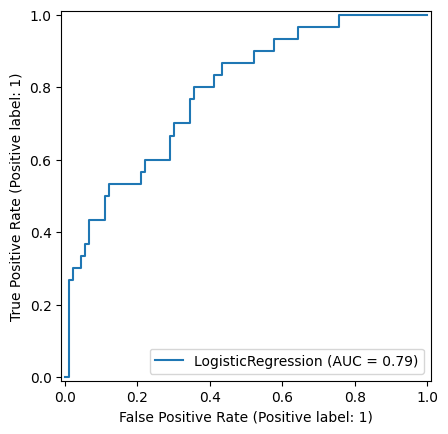

In [84]:
from sklearn.metrics import RocCurveDisplay
log_reg_disp = RocCurveDisplay.from_estimator(log_reg_model, X_test_scaled, y_test)

## Modeling - KNN  

In [85]:
#Default Modeling
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = knn_model.predict(X_train_scaled)
y_pred_test = knn_model.predict(X_test_scaled)

#evaluation
#1. train test accuracy
print("train accuracy:", accuracy_score(y_train, y_pred_train))
print("test accuracy:", accuracy_score(y_test, y_pred_test))

#2. cross validation score
scores = cross_val_score(knn_model, X_scaled, y)
print(scores)
print("cross validation score:", scores.mean())

train accuracy: 0.8805031446540881
test accuracy: 0.8833333333333333
[0.74166667 0.83333333 0.72268908 0.82352941 0.88235294]
cross validation score: 0.8007142857142856


In [86]:
# KNN with best hyperparameter
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1,50)), "p": [1,2]}

cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring="accuracy")
cv_classifier.fit(X_scaled, y)
cv_classifier.best_params_

{'n_neighbors': 2, 'p': 2}

In [87]:
#modeling
knn_model = KNeighborsClassifier(n_neighbors=2, p=2)
knn_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = knn_model.predict(X_train_scaled)
y_pred_test = knn_model.predict(X_test_scaled)

#evaluation
#1. train test accuracy
print("train accuracy:", accuracy_score(y_train, y_pred_train))
print("test accuracy:", accuracy_score(y_test, y_pred_test))

#2. cross validation score
scores = cross_val_score(knn_model, X_scaled, y)
print(scores)
print("cross validation score:", scores.mean())

train accuracy: 0.9119496855345912
test accuracy: 0.85
[0.84166667 0.84166667 0.80672269 0.80672269 0.8487395 ]
cross validation score: 0.8291036414565826


In [88]:
#Hyperparameter values
confusion_matrix(y_test, y_pred_test)

array([[87,  3],
       [15, 15]])

In [89]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        90
           1       0.83      0.50      0.62        30

    accuracy                           0.85       120
   macro avg       0.84      0.73      0.77       120
weighted avg       0.85      0.85      0.84       120



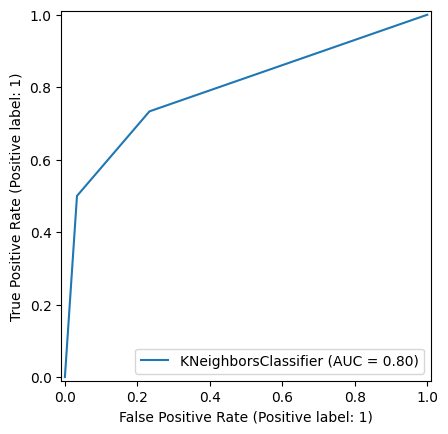

In [90]:
log_reg_disp = RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test)

## Modeling - SVM

In [91]:
#modeling
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

##prediction
y_pred_train = svm_model.predict(X_train_scaled)
y_pred_test = svm_model.predict(X_test_scaled)

#evaluation
#1. train test accuracy
print("train accuracy:", accuracy_score(y_train, y_pred_train))
print("test accuracy:", accuracy_score(y_test, y_pred_test))

#2. cross validation score
scores = cross_val_score(svm_model, X_scaled, y)
print(scores)
print("cross validation score:", scores.mean())


train accuracy: 0.8867924528301887
test accuracy: 0.825
[0.8        0.81666667 0.83193277 0.79831933 0.82352941]
cross validation score: 0.8140896358543417


In [92]:
#Hyperparameter Tuning

estimator = SVC()
param_grid = {"C": [0.01, 0.1, 1, 10, 100], "kernel":["linear", "rbf", "sigmoid", "poly"]}
grid = GridSearchCV(estimator, param_grid, cv=5, scoring="accuracy")
grid.fit(X_scaled, y)
grid.best_params_

{'C': 10, 'kernel': 'poly'}

In [93]:
#modeling
svm_model = SVC(kernel="poly", C=10)
svm_model.fit(X_train_scaled, y_train)

##prediction
y_pred_train = svm_model.predict(X_train_scaled)
y_pred_test = svm_model.predict(X_test_scaled)

#evaluation
#1. train test accuracy
print("train accuracy:", accuracy_score(y_train, y_pred_train))
print("test accuracy:", accuracy_score(y_test, y_pred_test))

#2. cross validation score
scores = cross_val_score(svm_model, X_scaled, y)
print(scores)
print("cross validation score:", scores.mean())

train accuracy: 0.9643605870020965
test accuracy: 0.8166666666666667
[0.80833333 0.8        0.86554622 0.82352941 0.81512605]
cross validation score: 0.8225070028011204


In [94]:
#results of hyperparameter tuning: increased train accuracy and cv score

In [95]:
#Hyperparameter values
confusion_matrix(y_test, y_pred_test)

array([[87,  3],
       [19, 11]])

In [96]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        90
           1       0.79      0.37      0.50        30

    accuracy                           0.82       120
   macro avg       0.80      0.67      0.69       120
weighted avg       0.81      0.82      0.79       120



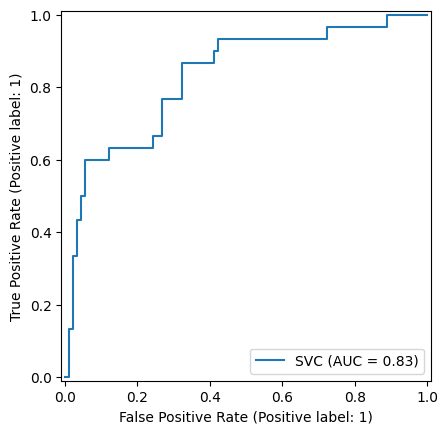

In [127]:
from sklearn.metrics import RocCurveDisplay
log_reg_disp = RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)

## Modeling - Decision Tree

In [97]:
#modeling
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 0)
dt_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = dt_model.predict(X_train_scaled)
y_pred_test = dt_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(dt_model, X_scaled, y, cv=5).mean())

train accuracy: 0.9979035639412998
test accuracy: 0.7
Cross validation score: 0.7285714285714286


In [98]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,24), dpi=400)

plot_tree(dt_model, filled=True)

plt.show()

In [99]:
#grid search cv
estimator = DecisionTreeClassifier(random_state=0)

param_grid ={"criterion": ["gini", "entropy"],
            "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

grid.fit(X_scaled, y)

grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [100]:
final_dt_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=6)
final_dt_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = final_dt_model.predict(X_train_scaled)
y_pred_test = final_dt_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(final_dt_model, X_scaled, y, cv=5).mean())

train accuracy: 0.8322851153039832
test accuracy: 0.7666666666666667
Cross validation score: 0.7554481792717087


In [101]:
confusion_matrix(y_test, y_pred_test)

array([[85,  5],
       [23,  7]])

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        90
           1       0.58      0.23      0.33        30

    accuracy                           0.77       120
   macro avg       0.69      0.59      0.60       120
weighted avg       0.74      0.77      0.73       120



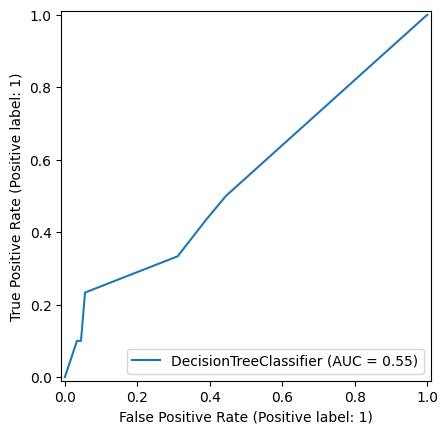

In [136]:
dt_display = RocCurveDisplay.from_estimator(final_dt_model, X_test_scaled, y_test)

## Modeling - Random Forest

In [103]:
#modeling
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=6)
rf_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(rf_model, X_scaled, y, cv=5).mean())

train accuracy: 0.9979035639412998
test accuracy: 0.7916666666666666
Cross validation score: 0.817436974789916


In [104]:
#hyperparameter tuning
estimator = RandomForestClassifier(random_state=6)

param_grid ={"n_estimators": list(range(1,101))}

grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

grid.fit(X_scaled, y)

grid.best_params_

{'n_estimators': 85}

In [105]:
#final model
final_rf_model = RandomForestClassifier(n_estimators=85, random_state=6)
final_rf_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = final_rf_model.predict(X_train_scaled)
y_pred_test = final_rf_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(final_rf_model, X_scaled, y, cv=5).mean())

train accuracy: 0.9979035639412998
test accuracy: 0.8083333333333333
Cross validation score: 0.8258403361344537


In [106]:
confusion_matrix(y_test, y_pred_test)

array([[87,  3],
       [20, 10]])

In [107]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        90
           1       0.77      0.33      0.47        30

    accuracy                           0.81       120
   macro avg       0.79      0.65      0.67       120
weighted avg       0.80      0.81      0.78       120



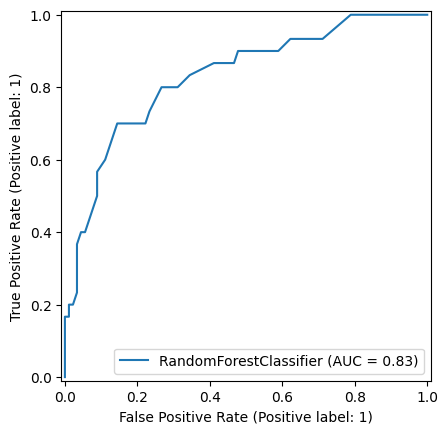

In [135]:
rf_display = RocCurveDisplay.from_estimator(final_rf_model, X_test_scaled, y_test)

# Modeling - Naive Bayes

In [108]:
#modeling
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB(var_smoothing = 1e-06)
gnb_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = gnb_model.predict(X_train_scaled)
y_pred_test = gnb_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(gnb_model, X_scaled, y, cv=5).mean())

train accuracy: 0.38155136268343814
test accuracy: 0.75
Cross validation score: 0.4809803921568627


In [109]:
#hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
}

grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'var_smoothing': 1e-06}


In [110]:
#final model
gnb_model_final = GaussianNB(var_smoothing = 1e-06)
gnb_model_final.fit(X_train_scaled, y_train)

#prediction
y_pred_train = gnb_model_final.predict(X_train_scaled)
y_pred_test = gnb_model_final.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(gnb_model_final, X_scaled, y, cv=5).mean())

train accuracy: 0.38155136268343814
test accuracy: 0.75
Cross validation score: 0.4809803921568627


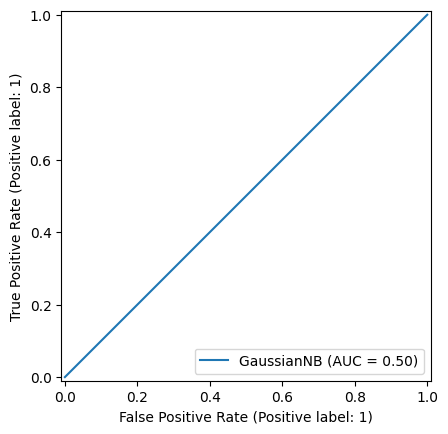

In [134]:
gnb_display = RocCurveDisplay.from_estimator(gnb_model_final, X_test_scaled, y_test)

## Modeling - AdaBoost

In [111]:
#modeling
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=6)
ada_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = ada_model.predict(X_train_scaled)
y_pred_test = ada_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(ada_model, X_scaled, y, cv=5).mean())

train accuracy: 0.8616352201257862
test accuracy: 0.7833333333333333
Cross validation score: 0.7755882352941176


In [112]:
#hyperparameter tuning
estimator = AdaBoostClassifier(random_state=6)

param_grid ={"n_estimators": list(range(1,51))}

grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

grid.fit(X_scaled, y)

grid.best_params_

{'n_estimators': 27}

In [113]:
#hyperparameter model
final_ada_model = AdaBoostClassifier(n_estimators= 27,random_state=6)
final_ada_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = final_ada_model.predict(X_train_scaled)
y_pred_test = final_ada_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(final_ada_model, X_scaled, y, cv=5).mean())

train accuracy: 0.8448637316561844
test accuracy: 0.7833333333333333
Cross validation score: 0.7839355742296918


In [114]:
confusion_matrix(y_test, y_pred_test)

array([[88,  2],
       [24,  6]])

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87        90
           1       0.75      0.20      0.32        30

    accuracy                           0.78       120
   macro avg       0.77      0.59      0.59       120
weighted avg       0.78      0.78      0.73       120



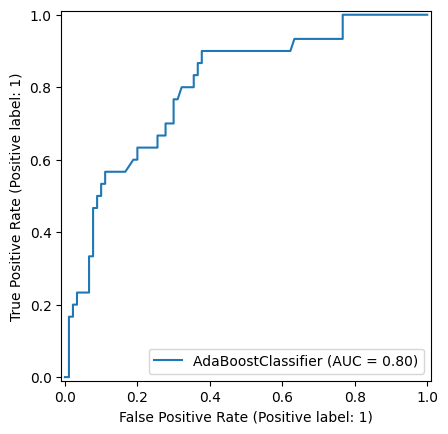

In [133]:
ada_display = RocCurveDisplay.from_estimator(final_ada_model, X_test_scaled, y_test)

## Modeling - XGBoost

In [116]:
#modeling
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=6)
xgb_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(xgb_model, X_scaled, y, cv=5).mean())

train accuracy: 0.9979035639412998
test accuracy: 0.7916666666666666
Cross validation score: 0.8157703081232495


In [117]:
#hyperparameter tuning
estimator = XGBClassifier(random_state=6)

param_grid ={"n_estimators": [10,20,40,100],
            'max_depth':[3,4,5],
            'gamma': [0, 0.15, 0.3, 0.5, 1]}

grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

grid.fit(X_scaled, y)

grid.best_params_

{'gamma': 0.3, 'max_depth': 4, 'n_estimators': 40}

In [118]:
#hyperparameter modeling
xgb_model = XGBClassifier(n_extimators=40, gamma=0.3, max_depth=4, random_state=6)
xgb_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(xgb_model, X_scaled, y, cv=5).mean())

train accuracy: 0.9979035639412998
test accuracy: 0.7916666666666666
Cross validation score: 0.8275210084033613


In [119]:
confusion_matrix(y_test, y_pred_test)

array([[88,  2],
       [23,  7]])

In [120]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        90
           1       0.78      0.23      0.36        30

    accuracy                           0.79       120
   macro avg       0.79      0.61      0.62       120
weighted avg       0.79      0.79      0.75       120



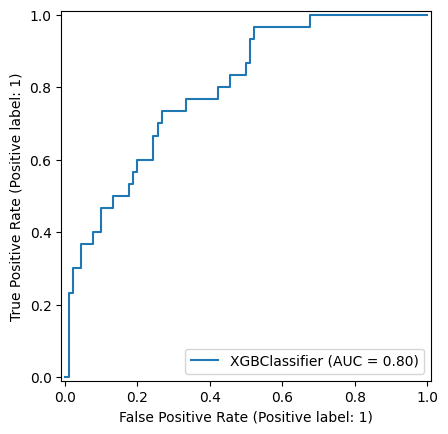

In [132]:
xgb_model_disp = RocCurveDisplay.from_estimator(xgb_model, X_test_scaled, y_test)

## Modeling - Gradient Boost

In [121]:
#modeling
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=6)
gb_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = gb_model.predict(X_train_scaled)
y_pred_test = gb_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(gb_model, X_scaled, y, cv=5).mean())

train accuracy: 0.989517819706499
test accuracy: 0.8
Cross validation score: 0.8040336134453783


In [122]:
#hyperparameter tuning
estimator = GradientBoostingClassifier(random_state=6)

param_grid ={"n_estimators": [1,5,10,20],
            'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.8, 1]}

grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

grid.fit(X_scaled, y)

grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 20}

In [123]:
#final modeling
gb_model = GradientBoostingClassifier(learning_rate=0.2, n_estimators=20, random_state=6)
gb_model.fit(X_train_scaled, y_train)

#prediction
y_pred_train = gb_model.predict(X_train_scaled)
y_pred_test = gb_model.predict(X_test_scaled)

#evaluation
print("train accuracy:", accuracy_score(y_pred_train, y_train))
print("test accuracy:", accuracy_score(y_pred_test, y_test))

print("Cross validation score:", cross_val_score(gb_model, X_scaled, y, cv=5).mean())

train accuracy: 0.939203354297694
test accuracy: 0.8
Cross validation score: 0.7973809523809524


In [124]:
confusion_matrix(y_test, y_pred_test)

array([[87,  3],
       [21,  9]])

In [125]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        90
           1       0.75      0.30      0.43        30

    accuracy                           0.80       120
   macro avg       0.78      0.63      0.65       120
weighted avg       0.79      0.80      0.77       120



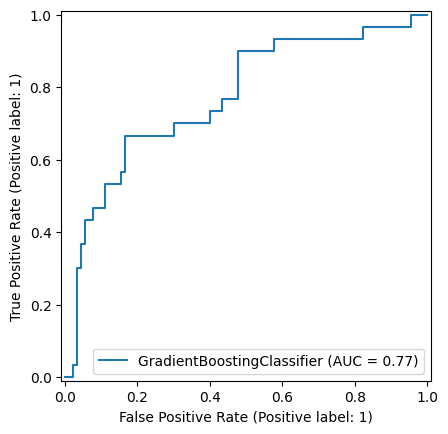

In [131]:
gb_model_disp = RocCurveDisplay.from_estimator(gb_model, X_test_scaled, y_test)

## Bagging

In [126]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Define base models
# of KNN and ANN performed best?
# svm_model = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=2, p=2)
ann_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Ensemble model (soft voting)
ensemble = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('ann', ann_model)
], voting='soft')  # Use 'hard' for majority voting

# Train ensemble
ensemble.fit(X_train_scaled, y_train)

# Evaluate
y_pred_train = ensemble.predict(X_train_scaled)
y_pred_test = ensemble.predict(X_test_scaled)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Cross Validation:", cross_val_score(ensemble, X_scaled, y, cv=5, scoring="accuracy").mean())
print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.9979035639412998
Test Accuracy: 0.875
Cross Validation: 0.8258123249299718
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        90
           1       0.80      0.67      0.73        30

    accuracy                           0.88       120
   macro avg       0.85      0.81      0.82       120
weighted avg       0.87      0.88      0.87       120



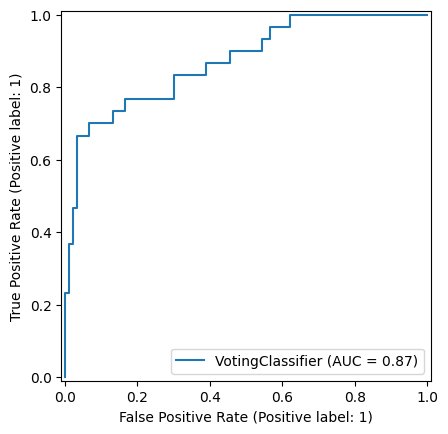

In [130]:
from sklearn.metrics import RocCurveDisplay
ensemble_disp = RocCurveDisplay.from_estimator(ensemble, X_test_scaled, y_test)

### SOFT
| Model | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| SVM + KNN | 0.85 | 0.57 | 0.94 |
| SVM + ANN | 0.83 | 0.47 | 0.96 |
| KNN + ANN | 0.88 | 0.67 | 0.94 |

### HARD
| Model | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| SVM + KNN | 0.82 | 0.30 | 1.00 |
| SVM + ANN | 0.81 | 0.27 | 0.99 |
| KNN + ANN | 0.82 | 0.33 | 0.99 |

# Conclusion
Among individual models, **KNN (accuracy 0.85, AUC 0.80)** and **SVM (accuracy 0.82, AUC 0.83)** performed best, while ensemble approaches further improved results. 

The **KNN + ANN** hybrid achieved the highest **accuracy (0.88)** with strong **sensitivity (0.67)**, **specificity (0.94)** and **AUC 0.87** indicating that ensemble learning provides more robust and clinically relevant predictions for drug-induced autoimmunity compared to standalone models.